<a href="https://colab.research.google.com/github/mikolajsemeniuk/Binary-Text-Classification-Using-TFIDF/blob/main/Binary_text_classification_using_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature detection using dimensionality reduction

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from numpy import ndarray
from pandas.core.frame import DataFrame
from pandas.core.series import Series

from typing import List, Dict, Tuple, Callable

## Load Dataset

In [2]:
path: str = \
    '/content/drive/MyDrive/Data/datasets/spam_messages/SPAM text message 20170820 - Data.csv'

dataset: DataFrame = pd.read_csv(path)

dataset.shape

(5572, 2)

## Explore dataset

In [3]:
dataset.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Check types

In [4]:
dataset.dtypes

Category    object
Message     object
dtype: object

### Check nulles

In [5]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

### Check ratio

In [6]:
dataset.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
f'ham: {747 / 5572 * 100}% of all dataset'

'ham: 13.406317300789663% of all dataset'

### Check unique values

In [8]:
dataset.Category.unique()

array(['ham', 'spam'], dtype=object)

### Check if `Message` contains no empty strings

In [9]:
0 == len(np.where(dataset['Message'] == '')[0])

True

## Data preparation

### Convert all columns to `string`

In [10]:
dataset = dataset.convert_dtypes() # dataset.Category = dataset.Category.astype('string')

dataset.dtypes

Category    string
Message     string
dtype: object

### Encode `Category` to numbers

In [11]:
from sklearn.preprocessing import LabelEncoder

y: ndarray = \
    LabelEncoder().fit_transform(dataset.Category)

y.shape, y.shape, y[:10]

((5572,), (5572,), array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1]))

### Encode `Message` to tfdif vectorizer
Version 1.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

X_counts: ndarray = \
    CountVectorizer().fit_transform(dataset.Message).toarray()

type(X_counts), X_counts.shape

(numpy.ndarray, (5572, 8709))

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()

X: ndarray = transformer.fit_transform(X_counts).toarray()

type(X), X.shape, X[X > 0]

(numpy.ndarray,
 (5572, 8709),
 array([0.32645117, 0.24417483, 0.31163293, ..., 0.55766163, 0.14864182,
        0.42358279]))

### Encode `Message` to tfdif vectorizer
Version 2.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X: ndarray = \
    TfidfVectorizer().fit_transform(dataset.Message).toarray()

type(X), X.shape, X[X > 0]

(numpy.ndarray,
 (5572, 8709),
 array([0.32645117, 0.24417483, 0.31163293, ..., 0.55766163, 0.14864182,
        0.42358279]))

## Concatenate Prepared data into one `DataFrame`

In [15]:
dataset_prepared: DataFrame = \
    pd.concat([pd.DataFrame(y), pd.DataFrame(X)], axis=1)
    
dataset_prepared.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,8669,8670,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into `train` and `test`

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021, stratify = dataset.Category)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900, 8709), (1672, 8709), (3900,), (1672,))

## Prepare model

In [17]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## Evaluate metrics

### Confusion Matrix

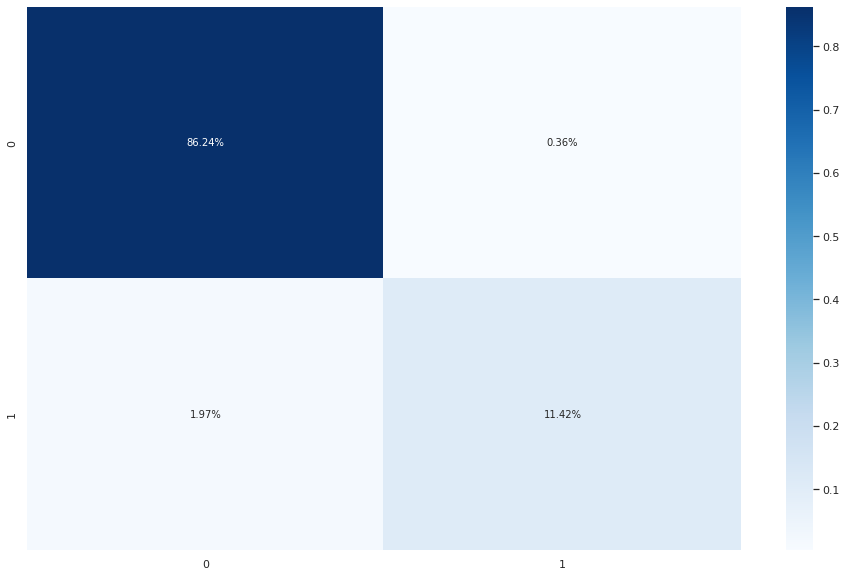

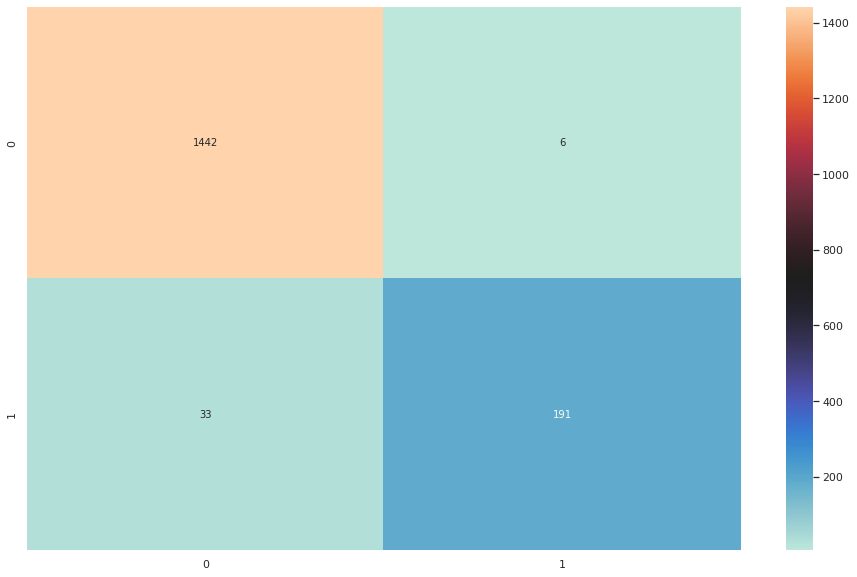

In [18]:
from sklearn.metrics import confusion_matrix

y_pred: ndarray = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16, 10))
sns.heatmap(matrix / np.sum(matrix), annot = True, fmt = '.2%', cmap = 'Blues')
plt.show()

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, annot = True, fmt = 'g', cmap = 'icefire')

### Classification Report

In [19]:
from sklearn.metrics import classification_report

report: str = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.97      0.85      0.91       224

    accuracy                           0.98      1672
   macro avg       0.97      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### Plot Precision-Recall

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from numpy import float64

precision: ndarray
recall: ndarray

precision, recall, _ = \
  precision_recall_curve(y_test, y_pred)

average_precision: float64 = \
  average_precision_score(y_test, y_pred)

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.85')

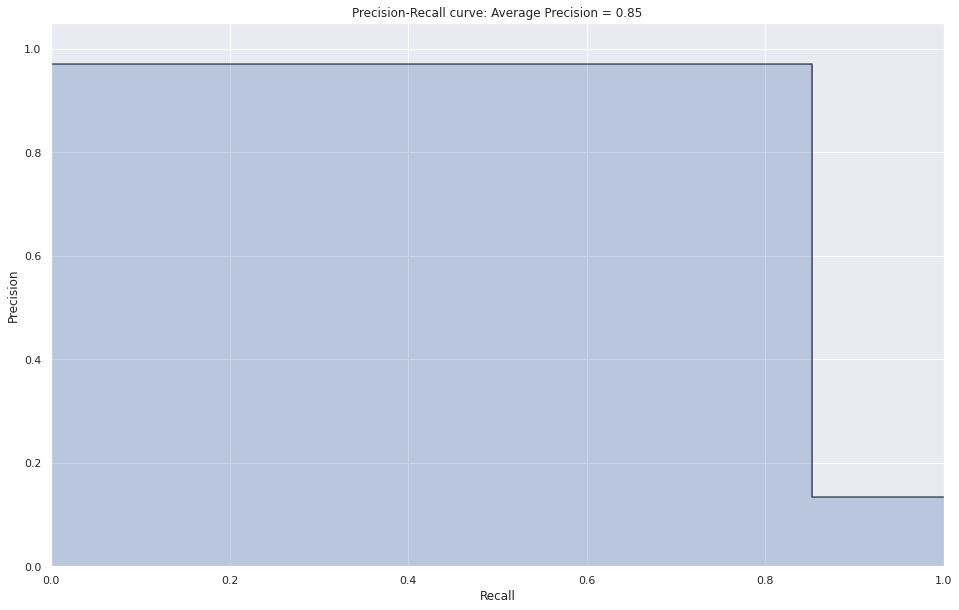

In [21]:
plt.figure(figsize=(16, 10))

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

### Plot ROC Curve

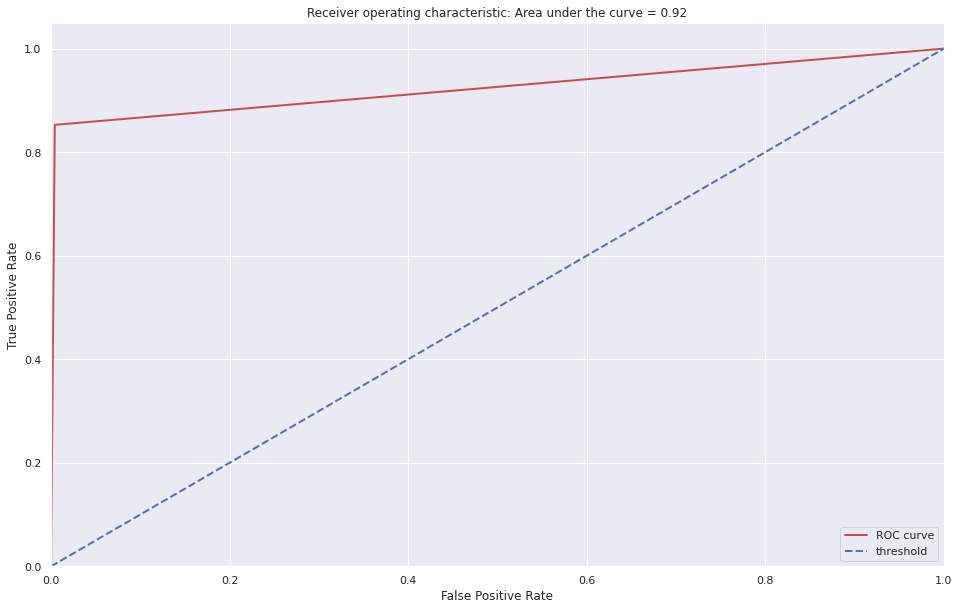

In [22]:
from sklearn.metrics import roc_curve, auc

fpr: np.ndarray
tpr: np.ndarray

fpr, tpr, _ = \
  roc_curve(y_test, y_pred)

areaUnderROC: float64 = auc(fpr, tpr)

plt.figure(figsize=(16, 10))

plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--', label='threshold')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

plt.show()